In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix ,accuracy_score, classification_report
import pandas as pd

In [ ]:
datapath = r'/content/drive/MyDrive/Group05/Classification/NLS_Group05.txt'

In [ ]:
def load_data(filepath):    
    data = np.loadtxt(filepath) # Reading data from text file using numpy
    return data

In [ ]:
dataset=np.loadtxt(datapath,skiprows=1)
class1_data=dataset[:1303]
class2_data=dataset[1303:]

In [ ]:
def plot(class1,class2):  
  x1 , y1 = class1[:,0] , class1[:,1]  
  x2 , y2 = class2[:,0] , class2[:,1]
 
  c1=plt.scatter(x1, y1,color="blue", edgecolors='black')
  c2=plt.scatter(x2, y2,color="orange",edgecolors='black')
  plt.title("Non-Linearly Separable Input Data")
  plt.legend((c1,c2),("class1","class2"))
  # plt.savefig("/content/drive/MyDrive/Group05/results/nl_input.png")

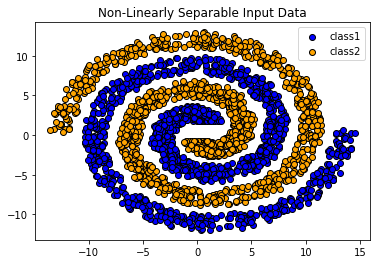

In [ ]:
  plot(class1_data,class2_data)

In [ ]:
def train_test_split(data):
  row, col = data.shape
  n = int(0.6*row)
  train = data[:n]
  validation=data[n:int(0.8*row)]
  test = data[int(0.8*row):row]
  return train,validation,test

In [ ]:
class1_train , class1_valid, class1_test  = train_test_split(class1_data)
class2_train , class2_valid, class2_test = train_test_split(class2_data)

class_train = np.append(class1_train,class2_train,axis=0) #Class 1 and Class 2 Training Data

class_test=np.append(class1_test,class2_test,axis=0)

print(class1_test.shape)

(261, 2)


In [ ]:
# Define sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [ ]:
# Define neural network architecture
input_size = 2
hidden_size1 = 20
hidden_size2 = 10
output_size = 1

In [ ]:
def training(hidden_size1,hidden_size2):  
  W1 = np.random.randn(input_size, hidden_size1)
  b1 = np.zeros((1, hidden_size1))
  W2 = np.random.randn(hidden_size1, hidden_size2)
  b2 = np.zeros((1, hidden_size2))
  W3 = np.random.randn(hidden_size2, output_size)
  b3 = np.zeros((1, output_size))

# Define learning rate and number of iterations
  learning_rate = 0.001
  num_iterations = 8000

  X=class_train
  print(X.shape)
  Y=[]
  err=[]
  avg_err=[]
  for i in range(781):
    Y.append([0])
  for i in range(781):
    Y.append([1])
  print(Y)
  # Y = np.array([[0], [1], [1], [0]])
  N, d = class_train.shape
  # Train the neural network
  for i in range(num_iterations):
      # Forward propagation
      Z1 = np.dot(X, W1) + b1
      # print(Z1.shape)
      A1 = sigmoid(Z1)
      Z2 = np.dot(A1, W2) + b2
      # print(Z2.shape)
      A2 = sigmoid(Z2)
      Z3 = np.dot(A2, W3) + b3
      # print(Z3.shape)
      Y_pred = sigmoid(Z3)
      # print(Y_pred.shape)
  
      # Backward propagation
      dZ3 = Y_pred - Y
      en=(0.5*dZ3**2)
      # err.append(en)
      # print(dZ3.shape)
      dW3 = np.dot(A2.T, dZ3)
      db3 = np.sum(dZ3, axis=0, keepdims=True)
      dZ2 = np.dot(dZ3, W3.T) * (A2 * (1 - A2))
      dW2 = np.dot(A1.T, dZ2)
      db2 = np.sum(dZ2, axis=0)
      dZ1 = np.dot(dZ2, W2.T) * (A1 * (1 - A1))
      dW1 = np.dot(X.T, dZ1)
      db1 = np.sum(dZ1, axis=0)
  
      # Update weights and biases
      W3 -= learning_rate * dW3
      b3 -= learning_rate * db3
      W2 -= learning_rate * dW2
      b2 -= learning_rate * db2
      W1 -= learning_rate * dW1
      b1 -= learning_rate * db1
      error_avg = np.asscalar(sum(en)/len(en))
      print(error_avg)
      avg_err.append(error_avg)

  return W3,b3,W2,b2,W1,b1,avg_err

In [ ]:
y_true=[]
for i in range(261):
  y_true.append(0)
for i in range(261):
  y_true.append(1)

In [ ]:
w31,b31,w21,b21,w11,b11,avg_err1 = training(8,8)

(1562, 2)
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

<ipython-input-28-960b6d0474a0>:60: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  error_avg = np.asscalar(sum(en)/len(en))


Streaming output truncated to the last 5000 lines.
0.08431631262677076
0.0843108774889181
0.08430544519813858
0.08430001574648739
0.08429458912602035
0.08428916532879556
0.08428374434687219
0.08427832617231211
0.08427291079717902
0.0842674982135391
0.08426208841346165
0.0842566813890188
0.08425127713228556
0.08424587563534078
0.08424047689026626
0.08423508088914886
0.08422968762407845
0.08422429708714972
0.08421890927046188
0.08421352416611812
0.08420814176622791
0.08420276206290464
0.08419738504826749
0.08419201071444123
0.08418663905355625
0.08418127005774911
0.08417590371916178
0.08417054002994341
0.08416517898224879
0.08415982056823992
0.08415446478008531
0.08414911160996061
0.08414376105004871
0.08413841309253955
0.08413306772963058
0.08412772495352688
0.0841223847564415
0.08411704713059553
0.0841117120682175
0.08410637956154471
0.08410104960282296
0.08409572218430579
0.08409039729825593
0.08408507493694468
0.0840797550926523
0.08407443775766797
0.08406912292428974
0.0840638105848

In [ ]:
w32,b32,w22,b22,w12,b12,avg_err2 = training(15,12)

(1562, 2)
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

<ipython-input-28-960b6d0474a0>:60: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  error_avg = np.asscalar(sum(en)/len(en))


Streaming output truncated to the last 5000 lines.
0.06963121447061887
0.06763638462244347
0.06982392181963086
0.06765403332226098
0.06964259398429744
0.06781299361462473
0.0697786812377734
0.06821590576341009
0.07022928839919566
0.06936690947026443
0.0722846665413831
0.07584116484730061
0.08108065644866469
0.08845354115468441
0.07740511800189082
0.07759571086657123
0.07922008206822248
0.07612473229893289
0.07683081085504906
0.07442887672844713
0.07526015209631484
0.07367879107290913
0.0746496122642002
0.07366256150198894
0.0744367149837141
0.07434477828658208
0.07410926740023471
0.07439861892896077
0.07249879330968445
0.07243684127226908
0.07056503643060072
0.07047439823909696
0.06948833200750121
0.06903185907740307
0.06861057461307209
0.06813307087009578
0.067978225622659
0.0676559265189448
0.06764288182413791
0.06758809509393311
0.06763234113741835
0.06796521367384603
0.0679441728354158
0.06874902148185834
0.06847569355543937
0.06949255144231356
0.06903124307070371
0.069735849651423

In [ ]:
w33,b33,w23,b23,w13,b13,avg_err3 = training(18,10)

(1562, 2)
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

<ipython-input-28-960b6d0474a0>:60: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  error_avg = np.asscalar(sum(en)/len(en))


Streaming output truncated to the last 5000 lines.
0.06826510095118013
0.07172580548218625
0.0691662796559215
0.07285372517803926
0.07104098863843718
0.07486815622431578
0.07492576408468668
0.077278864452605
0.0780709476515849
0.07645401973907752
0.07398186699603566
0.07257339696585768
0.07238796039450167
0.07024875062409042
0.07101752647957017
0.06934848072915743
0.07185828049082112
0.06845324060911386
0.0694819180283254
0.06807852566409595
0.07044530982505626
0.06823052827587858
0.06975271661824649
0.06851113790807838
0.0706196339153171
0.06888457421705312
0.07005104515620869
0.06939196950847026
0.07109323217878702
0.06987821123984927
0.0705312982499531
0.07025981220711834
0.07140323419969344
0.07049087541977181
0.07055948422089514
0.07056010864251144
0.0712766627854015
0.07055080264421489
0.07028950261490327
0.07041505639153225
0.0709675384527438
0.07028507785137281
0.0699743125370303
0.07006423566595946
0.0706811632184508
0.06987774289775057
0.06972463738840849
0.06962500195609053


In [ ]:
w34,b34,w24,b24,w14,b14,avg_err4 = training(20,10)

(1562, 2)
[[0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0], [0],

<ipython-input-28-960b6d0474a0>:60: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  error_avg = np.asscalar(sum(en)/len(en))


Streaming output truncated to the last 5000 lines.
0.05272736501480927
0.051076889711909323
0.05270310886028042
0.051018902246319345
0.05261708629441863
0.05099088341221949
0.05258561646538522
0.05093298021048894
0.05250108591081581
0.05090169404283911
0.05246568491585039
0.050845726691912556
0.0523872060031743
0.05081394407043824
0.05235359906206285
0.050762586295939265
0.0522860995427341
0.05073299891489605
0.052258604078280806
0.050687723646971036
0.052203446107301585
0.0506609924954317
0.052181546270611605
0.050620525362657334
0.052134291149258764
0.05059429007436563
0.05211163637769721
0.050554493083544746
0.052062929675376866
0.05052413323667509
0.05202989384447767
0.05047984965965589
0.05197006232676155
0.05044125326130781
0.051919894933867484
0.05038983148339476
0.051846113715246105
0.050343172920904934
0.05178200991722565
0.05028777468578644
0.05170364152290565
0.05023957630011368
0.051640988125282755
0.05018908097867495
0.05157717252114737
0.05014954657212926
0.05153637790407

In [ ]:
# Test the neural network
def testing(test_data,W1,b1,W2,b2,W3,b3):
  test_X = test_data
  a1_list=[]
  a2_list=[]

  test_Z1 = np.dot(test_X, W1) + b1
  # print(test_Z1.shape)
  test_A1 = sigmoid(test_Z1)
  a1_list.append(test_A1)
  test_Z2 = np.dot(test_A1, W2) + b2
  # print(test_Z2.shape)
  test_A2 = sigmoid(test_Z2)
  a2_list.append(test_A2)
  test_Z3 = np.dot(test_A2, W3) + b3
  # print(test_Z3.shape)
  test_Y_pred = sigmoid(test_Z3)
  # print(test_Y_pred.shape)
  y_pred=[]
  for i in test_Y_pred:
    
    if i >= .5:
      y_pred.append(1)
    else:
      y_pred.append(0)
  return y_pred ,np.array(test_A1),np.array(test_A2)

In [ ]:
yp1,h11,h21=testing(class_test,w11,b11,w21,b21,w31,b31)
yp2,h12,h22=testing(class_test,w12,b12,w22,b22,w32,b32)
yp3,h13,h23=testing(class_test,w13,b13,w23,b23,w33,b33)
yp4,h14,h24=testing(class_test,w14,b14,w24,b24,w34,b34)
h11.shape


(522, 8)

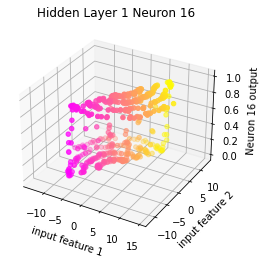

In [ ]:
x,y,z=class_test[:,0],class_test[:,1],h14[:,15]
fig = plt.figure()
ax = plt.axes(projection ="3d")
color_map = plt.get_cmap('spring')
scatter_plot = ax.scatter3D(x, y, z, c=(x+y+z),cmap=color_map)
plt.title("Hidden Layer 1 Neuron 16")
plt.xlabel("input feature 1")
plt.ylabel("input feature 2")
ax.set_zlabel("Neuron 16 output")
cb=plt.colorbar(scatter_plot)
cb.remove() 

In [ ]:
y_pred= testing(class_test)
print("Confusion Matrix")
print(confusion_matrix(y_true,y_pred))

Confusion Matrix
[[243  18]
 [ 13 248]]


In [ ]:
print("ACCURACY OF LINEARLY SEPARABLE DATA: ",accuracy_score(y_true, y_pred))

ACCURACY OF LINEARLY SEPARABLE DATA:  0.9406130268199234


In [ ]:

all_points = []
for i in range(-15, 16):
    for j in range(-15, 16):
        all_points.append([i, j])
        
all_points = pd.DataFrame(all_points)
print(all_points)

      0   1
0   -15 -15
1   -15 -14
2   -15 -13
3   -15 -12
4   -15 -11
..   ..  ..
956  15  11
957  15  12
958  15  13
959  15  14
960  15  15

[961 rows x 2 columns]


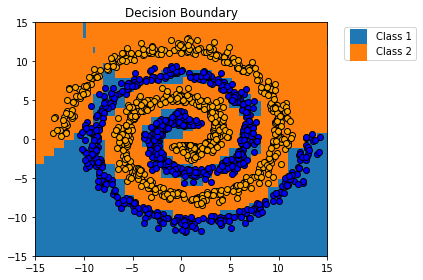

In [ ]:
y = testing(all_points)
# print(y)

c1x, c2x=[], []
c1y, c2y=[], []

for i in range(len(all_points)):
        
    if y[i] == 0:
        c1x.append(all_points.iloc[i, 0])
        c1y.append(all_points.iloc[i, 1])
    elif y[i]==1:
        c2x.append(all_points.iloc[i, 0])
        c2y.append(all_points.iloc[i, 1])

plt.scatter(c1x, c1y, marker='s', s=250)
plt.scatter(c2x, c2y, marker='s', s=250)




plt.legend(['Class 2', 'Class 1'])
plt.legend(['Class 1','Class 2'], bbox_to_anchor=(1.04,1), loc="upper left")


plt.scatter(class1_train[:,0], class1_train[:,1],color="blue", edgecolors='black')
plt.scatter(class2_train[:,0], class2_train[:,1],color="orange", edgecolors='black')


plt.title("Decision Boundary")
plt.tight_layout()
plt.xlim(-15, 15)
plt.ylim(-15, 15)

plt.show()

# **Avg Error V/S Epochs**

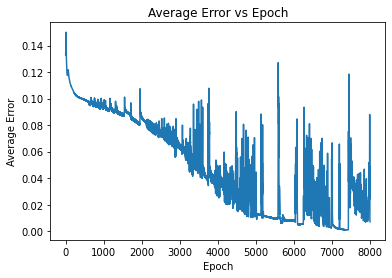

In [ ]:
plt.plot(avg_err)
plt.title("Average Error vs Epoch")
plt.xlabel("Epoch")
plt.ylabel("Average Error")
plt.show()